<a href="https://colab.research.google.com/github/KruglovaKate/Transfer-Learning/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import zipfile
import os
zip_file = "/content/gdrive/MyDrive/archive.zip"
z = zipfile.ZipFile(zip_file, 'r')
z.extractall()
print(os.listdir())

['.config', '17flowers', 'gdrive', 'sample_data']


In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import VisionDataset
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.transforms import ToTensor,Resize, Grayscale, Normalize
import matplotlib.pyplot as plt
import zipfile 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
CLASSES_PATHS = {
   
        0: ["/content/17flowers/jpg/0"],
        1: ["/content/17flowers/jpg/1"],
        2: ["/content/17flowers/jpg/2"],
        3: ["/content/17flowers/jpg/3"],
        4: ["/content/17flowers/jpg/4"],
        5: ["/content/17flowers/jpg/5"],
        6: ["/content/17flowers/jpg/6"],
        7: ["/content/17flowers/jpg/7"],
        8: ["/content/17flowers/jpg/8"],
        9: ["/content/17flowers/jpg/9"],
        10: ["/content/17flowers/jpg/10"],
        11: ["/content/17flowers/jpg/11"],
        12: ["/content/17flowers/jpg/12"],
        13: ["/content/17flowers/jpg/13"],
        14: ["/content/17flowers/jpg/14"],
        15: ["/content/17flowers/jpg/15"],
        16: ["/content/17flowers/jpg/16"]
}

In [3]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import glob
import cv2
from torchvision import transforms

class My_class(Dataset):
    def __init__(self,  classes_paths, transforms=None, target_transform=None):
        #print(glob.glob(data_dir))
        self.classes = []
        self.images = []
        self.transform = transforms
        for actual_class in classes_paths:
            if actual_class == 1:
                print("")
            paths = classes_paths[actual_class]
            for path in paths:
                print("Loading " + path)
                for top, dirs, files in os.walk(path):
                    for i, name in enumerate(files):
                        if not os.path.isfile(top + "//" + name):
                            continue
                        try:
                            imag = cv2.imread(top + "//" + name)
                            imag = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)
                        except Exception:
                            continue
                        
                        self.images.append(imag)
                        self.classes.append(actual_class)
                        image1 = cv2.flip(imag, 0)                                       
                        self.images.append(image1)
                        self.classes.append(actual_class)
                        image2 = cv2.flip(imag, 1) 
                        self.images.append(image2)
                        self.classes.append(actual_class)
                        image3 = cv2.rotate( imag, cv2.ROTATE_90_CLOCKWISE)
                        self.images.append(image3)
                        self.classes.append(actual_class)
                        image4 = cv2.rotate( imag, cv2.ROTATE_90_COUNTERCLOCKWISE)
                        self.images.append(image4)
                        self.classes.append(actual_class)
        self.images, self.classes = np.array(self.images), np.array(self.classes)       

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        if self.transform==None:
           return self.images[idx], self.classes[idx]
        else:
           return self.transform(np.array(self.images[idx])), self.classes[idx]

In [4]:
transforms = transforms.Compose([ToTensor(), Resize([256, 256])])

In [5]:
dataset = My_class(CLASSES_PATHS, transforms)
param = 0.9
dataset_train, dataset_test = torch.utils.data.random_split(dataset, [int(len(dataset)*param), len(dataset)-int(len(dataset)*param)])
train_loader = DataLoader(dataset_train, batch_size=32, shuffle= True)
test_loader = DataLoader(dataset_test, batch_size=32, shuffle= True)

Loading /content/17flowers/jpg/0

Loading /content/17flowers/jpg/1
Loading /content/17flowers/jpg/2
Loading /content/17flowers/jpg/3
Loading /content/17flowers/jpg/4
Loading /content/17flowers/jpg/5
Loading /content/17flowers/jpg/6
Loading /content/17flowers/jpg/7
Loading /content/17flowers/jpg/8
Loading /content/17flowers/jpg/9
Loading /content/17flowers/jpg/10
Loading /content/17flowers/jpg/11
Loading /content/17flowers/jpg/12
Loading /content/17flowers/jpg/13
Loading /content/17flowers/jpg/14
Loading /content/17flowers/jpg/15
Loading /content/17flowers/jpg/16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Feature batch shape: torch.Size([32, 3, 256, 256])
Labels batch shape: torch.Size([32])


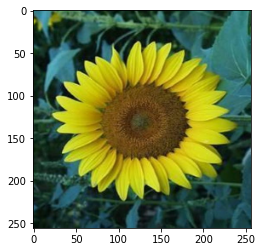

Label: 9


In [6]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
img = np.transpose(img, (2,1,0)) 
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")

In [19]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class TwoLayerCNN(nn.Module):

    def __init__(self):

        super(TwoLayerCNN, self).__init__() 

        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 3, 3)
        self.conv4 = nn.Conv2d(3, 6, 3)
        
        self.fc1 = nn.Linear(22326, 17) 
    

    def forward(self, x):

        x = self.conv1(x) 
        x = F.relu(x)
        x = self.conv2(x) 
        x = F.relu(x)
        x = F.max_pool2d(x, (2, 2))
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2, 2))
        x = torch.flatten(x,1)
        x = self.fc1(x) 
 
        return x     
  


In [8]:
import torch.optim as optim

def validate(model,testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total  

In [9]:
import torch

def train(model, loss_function,optimizer , epochs):
    loss_hist = []
    test_accuracy = []
    train_accuracy = []
    for epoch in range(epochs):
        ep_loss = 0
        for images, labels in train_loader: # get bacth  
            images = images.cuda()
            labels = labels.cuda()       
            optimizer.zero_grad() # sets the gradients of all optimized tensors to zero.
            outputs = model.forward(images) # call forward inside 
            loss = loss_function(outputs, labels) # calculate loss
            loss.backward() # calculate gradients
            optimizer.step() # performs a single optimization step (parameter update).
            ep_loss += loss.item()
        loss_hist.append(ep_loss /len(train_loader))
        print(f"Epoch={epoch} loss={loss_hist[epoch]:.4}")
      #  test_accuracy.append(validate(model, test_loader))
       # train_accuracy.append(validate(model, train_loader))
    return  loss_hist

In [23]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
model = TwoLayerCNN().to(device)  # Create model instance
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Weight update
loss_hist = train(model,  nn.CrossEntropyLoss().cuda(), optimizer, epochs = 10)

Using device: cuda
Epoch=0 loss=2.841
Epoch=1 loss=2.834
Epoch=2 loss=2.833
Epoch=3 loss=2.833
Epoch=4 loss=2.833
Epoch=5 loss=2.833
Epoch=6 loss=2.833
Epoch=7 loss=2.833
Epoch=8 loss=2.833
Epoch=9 loss=2.833


In [16]:
epochs = 10
def test(new_model, loss_function, epochs =10):
  correct = 0
  total = 0
  loss_test = []
  for epoch in range(epochs):
        ep_loss = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.cuda()
                labels = labels.cuda()
          # calculate outputs by running images through the network
                outputs = new_model(images)
                loss = loss_function(outputs, labels)
                ep_loss += loss.item()
          # the class with the highest energy is what we choose as prediction
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
        loss_test.append(ep_loss /len(test_loader))
        print(f"Epoch={epoch} loss={loss_test[epoch]:.4}")
  print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))
  return loss_test

In [24]:
loss_test = test(model, nn.CrossEntropyLoss(), epochs = 10)

Epoch=0 loss=2.835
Epoch=1 loss=2.836
Epoch=2 loss=2.835
Epoch=3 loss=2.836
Epoch=4 loss=2.835
Epoch=5 loss=2.835
Epoch=6 loss=2.835
Epoch=7 loss=2.836
Epoch=8 loss=2.835
Epoch=9 loss=2.835
Accuracy of the network on the 10000 test images: 4 %


# Pretrained models


In [11]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import datasets, models, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy


In [12]:
model_ft = models.resnet18(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [25]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [26]:
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 17)

model_conv = model_conv.cuda()

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001)


In [27]:
loss_hist = train(model_conv, criterion.cuda(), optimizer_conv, epochs=10)

Epoch=0 loss=2.683
Epoch=1 loss=2.208
Epoch=2 loss=1.847
Epoch=3 loss=1.576
Epoch=4 loss=1.355
Epoch=5 loss=1.192
Epoch=6 loss=1.064
Epoch=7 loss=0.9648
Epoch=8 loss=0.8803
Epoch=9 loss=0.8143


In [28]:
loss_test = test(model_conv, nn.CrossEntropyLoss().cuda(), epochs = 10)

Epoch=0 loss=0.8065
Epoch=1 loss=0.8125
Epoch=2 loss=0.8034
Epoch=3 loss=0.7946
Epoch=4 loss=0.8073
Epoch=5 loss=0.8134
Epoch=6 loss=0.8007
Epoch=7 loss=0.7935
Epoch=8 loss=0.8148
Epoch=9 loss=0.8314
Accuracy of the network on the 10000 test images: 89 %


# Fine Tuning

In [13]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 17)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [14]:
loss_hist = train(model_ft, criterion.cuda(), optimizer_ft, epochs=10)

Epoch=0 loss=0.9311
Epoch=1 loss=0.1451
Epoch=2 loss=0.07125
Epoch=3 loss=0.04397
Epoch=4 loss=0.03065
Epoch=5 loss=0.02148
Epoch=6 loss=0.0159
Epoch=7 loss=0.01384
Epoch=8 loss=0.01134
Epoch=9 loss=0.01037


In [17]:
loss_test = test(model_ft, nn.CrossEntropyLoss().cuda(), epochs = 10)

Epoch=0 loss=0.02669
Epoch=1 loss=0.03152
Epoch=2 loss=0.03345
Epoch=3 loss=0.03101
Epoch=4 loss=0.03942
Epoch=5 loss=0.04023
Epoch=6 loss=0.04673
Epoch=7 loss=0.03369
Epoch=8 loss=0.03434
Epoch=9 loss=0.03616
Accuracy of the network on the 10000 test images: 99 %
